/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_4944/3480670350.py:5: DtypeWarning: Columns (9,15,17,23,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')


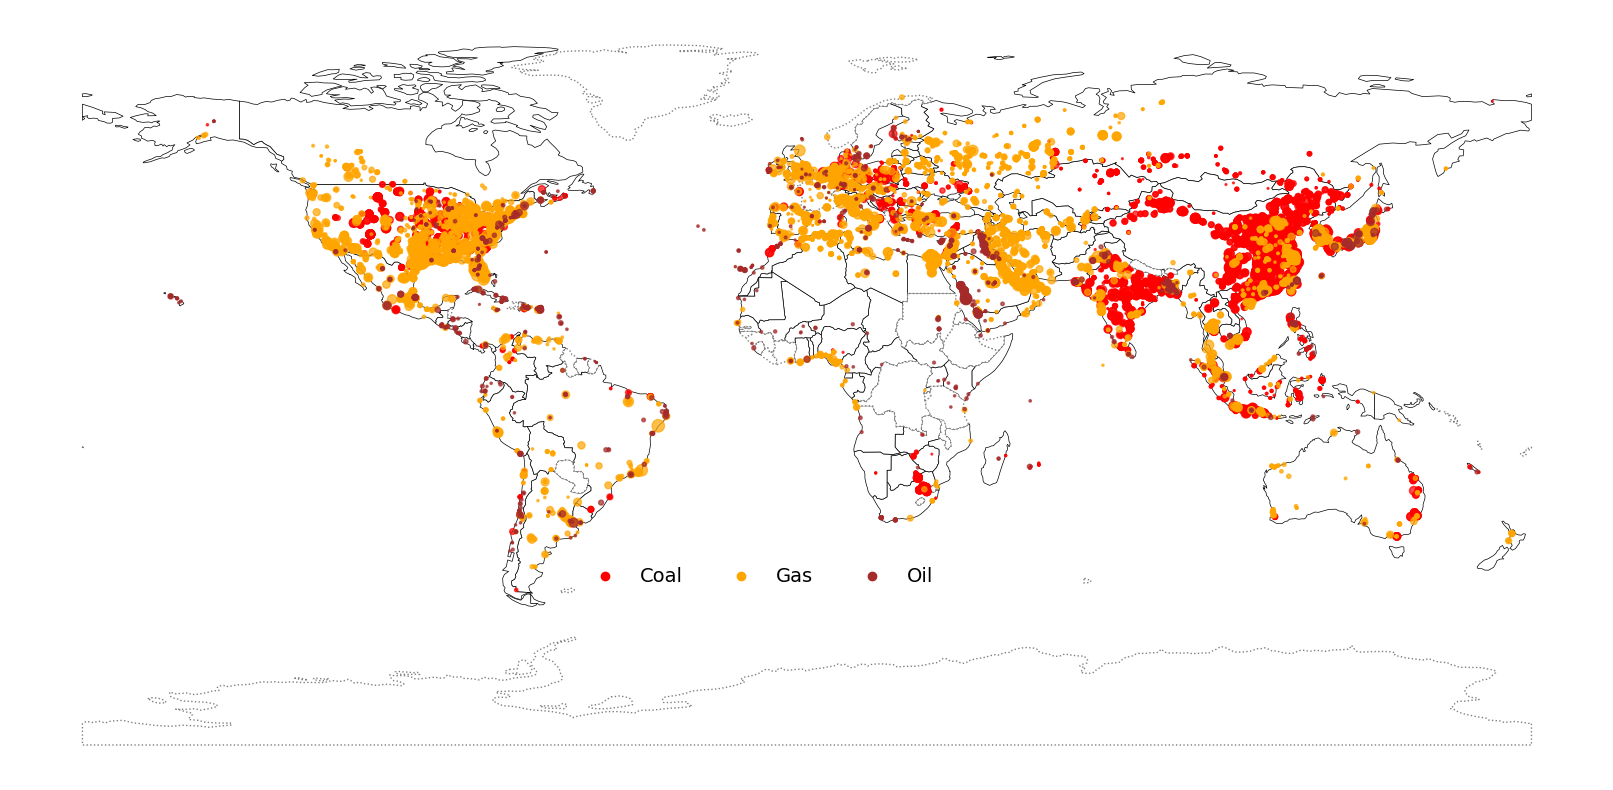

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')

# Filter plants and convert emissions to Gt
fossil_plants = df[
    (df['status'] == 'operating') & 
    (df['subsector'].isin(['Coal', 'Oil', 'Gas']))
].copy()

fossil_plants['annual_co2_calc_gt'] = fossil_plants['annualco2tyear'] / 1000
country_emissions = fossil_plants.groupby('countryiso3')['annual_co2_calc_gt'].sum().reset_index()

# Load and merge world map
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
world = world.merge(country_emissions, how='left', left_on='ISO_A3', right_on='countryiso3')

# Create mask for countries with no data
missing_data = world[world['annual_co2_calc_gt'].isna()]

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_facecolor('#F0F8FF')

# Plot countries with data
world[world['annual_co2_calc_gt'].notna()].plot(
    ax=ax, 
    color='white',
    edgecolor='black',
    linewidth=0.5
)

# Plot countries without data
missing_data.plot(
    ax=ax,
    color='white',
    edgecolor='gray',
    linestyle=':',
    linewidth=1
)

scatter = plt.scatter(
    fossil_plants['longitude'],
    fossil_plants['latitude'],
    c=fossil_plants['subsector'].map({'Coal': 'red', 'Gas': 'orange', 'Oil': 'brown'}),
    s=fossil_plants['capacity']/20,
    alpha=0.7
)

handles = [plt.scatter([], [], c=c, label=l) for l, c in zip(['Coal', 'Gas', 'Oil'], ['red', 'orange', 'brown'])]
plt.legend(handles=handles, bbox_to_anchor=(0.35, 0.3), frameon=False, ncol=3, fontsize='14')

ax.axis('off')
plt.tight_layout()
plt.show()

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_33594/2520948108.py:5: DtypeWarning: Columns (9,15,17,23,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')


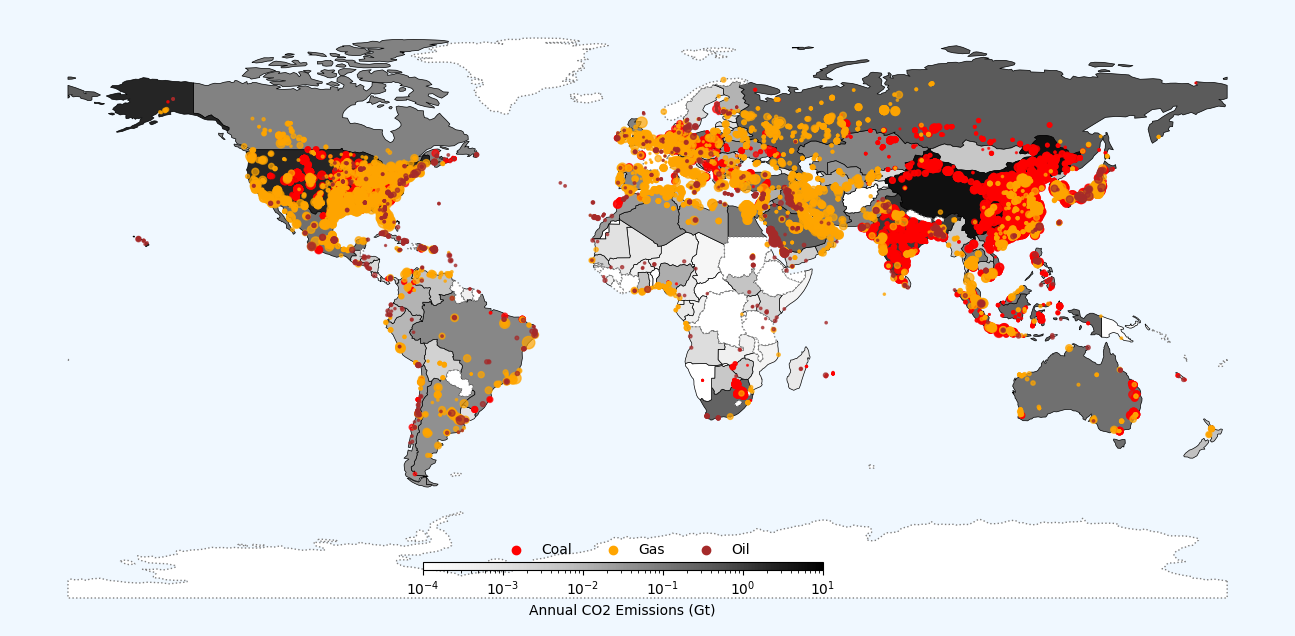

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')

# Filter plants and convert emissions to Gt
fossil_plants = df[
    (df['status'] == 'operating') & 
    (df['subsector'].isin(['Coal', 'Oil', 'Gas']))
].copy()

fossil_plants['annual_co2_calc_gt'] = fossil_plants['annualco2tyear'] / 1000
country_emissions = fossil_plants.groupby('countryiso3')['annual_co2_calc_gt'].sum().reset_index()

# Load and merge world map
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
world = world.merge(country_emissions, how='left', left_on='ISO_A3', right_on='countryiso3')

# Plot
# Create mask for countries with no data
missing_data = world[world['annual_co2_calc_gt'].isna()]

# Plot in layers
fig, ax = plt.subplots(figsize=(20, 8))

# Plot countries with data
world[world['annual_co2_calc_gt'].notna()].plot(ax=ax, column='annual_co2_calc_gt', cmap='Greys', norm=LogNorm(vmin=0.0001, vmax=10), edgecolor='black', linewidth=0.5)

# Plot countries without data
missing_data.plot(ax=ax, color='white', edgecolor='gray', linestyle=':', linewidth=1)

scatter = plt.scatter(
    fossil_plants['longitude'],
    fossil_plants['latitude'],
    c=fossil_plants['subsector'].map({'Coal': 'red', 'Gas': 'orange', 'Oil': 'brown'}),
    s=fossil_plants['capacity']/20,
    alpha=0.7
)

# Colorbar and legend
cbar_ax = fig.add_axes([0.4, 0.18, 0.2, 0.01])
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=LogNorm(vmin=0.0001, vmax=10), cmap='Greys'),
                   cax=cbar_ax,
                   orientation='horizontal')
cbar.ax.set_xlabel('Annual CO2 Emissions (Gt)')

handles = [plt.scatter([], [], c=c, label=l) for l, c in zip(['Coal', 'Gas', 'Oil'], ['red', 'orange', 'brown'])]
plt.legend(handles=handles, bbox_to_anchor = (0.85,5), frameon=False, ncol=3)

ax.axis('off')
plt.tight_layout
plt.show()

In [2]:
import pandas as pd


df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')

# Basic info and structure
print("DataFrame Info:")
df.info()

# First few rows and basic statistics
print("\nFirst 5 rows:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts().head())

# Data types of columns
print("\nColumn data types:")
print(df.dtypes)

/var/folders/n_/wz0dpmns379dn5s9v5qcpxww0000gn/T/ipykernel_33594/597978031.py:4: DtypeWarning: Columns (9,15,17,23,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/yukthabhadane/Documents/Climate Finance Thesis/Data/v3_power_Forward_Analytics2024.csv')


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125915 entries, 0 to 125914
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   forwardcompanyid        125915 non-null  object 
 1   directownerfirm         125915 non-null  object 
 2   uniqueforwardassetid    125915 non-null  object 
 3   originalrawsource       113669 non-null  object 
 4   asset_name              125915 non-null  object 
 5   asset_unit              120316 non-null  object 
 6   sector                  125915 non-null  object 
 7   subsector               125915 non-null  object 
 8   technology_type         125908 non-null  object 
 9   technology_subtype      29200 non-null   object 
 10  technology_sub_subtype  12246 non-null   float64
 11  countryiso3             125915 non-null  object 
 12  latitude                125915 non-null  float64
 13  longitude               125915 non-null  float64
 14  emis